In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [2]:
wine=pd.read_csv(r'C:\Users\Vikas Salunke\Desktop\Data Science\wine.csv')
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
wine['Type'].value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

In [4]:
wine2=wine.iloc[:,3:]
wine2

,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...
173,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [5]:
wine2.shape

(178, 11)

In [6]:
wine2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ash              178 non-null    float64
 1   Alcalinity       178 non-null    float64
 2   Magnesium        178 non-null    int64  
 3   Phenols          178 non-null    float64
 4   Flavanoids       178 non-null    float64
 5   Nonflavanoids    178 non-null    float64
 6   Proanthocyanins  178 non-null    float64
 7   Color            178 non-null    float64
 8   Hue              178 non-null    float64
 9   Dilution         178 non-null    float64
 10  Proline          178 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 15.4 KB


In [7]:
wine_ary=wine2.values
wine_ary

array([[2.430e+00, 1.560e+01, 1.270e+02, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [2.140e+00, 1.120e+01, 1.000e+02, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [2.670e+00, 1.860e+01, 1.010e+02, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [2.260e+00, 2.000e+01, 1.200e+02, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [2.370e+00, 2.000e+01, 1.200e+02, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [2.740e+00, 2.450e+01, 9.600e+01, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [8]:
wine_norm=scale(wine_ary)
wine_norm

array([[ 0.23205254, -1.16959318,  1.91390522, ...,  0.36217728,
         1.84791957,  1.01300893],
       [-0.82799632, -2.49084714,  0.01814502, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 1.10933436, -0.2687382 ,  0.08835836, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [-0.38935541,  0.15166079,  1.42241183, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.01273209,  0.15166079,  1.42241183, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.36520822,  1.50294326, -0.26270834, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [9]:
pca=PCA(n_components=11)

wine_pca=pca.fit_transform(wine_norm)
wine_pca

array([[ 3.07476421, -1.09833809, -0.38062803, ...,  0.08626453,
         0.93366664, -0.06454315],
       [ 2.10320073,  0.7331508 , -1.94349592, ..., -0.19513089,
         0.29599497,  0.01457196],
       [ 2.60114767, -1.27460479,  0.54155718, ..., -0.49908473,
        -0.12711972,  0.02912235],
       ...,
       [-2.45407082, -2.34679057, -1.65396381, ...,  0.47702214,
         0.4430657 ,  0.05757247],
       [-2.51186888, -2.35356911, -1.09325551, ...,  0.40202222,
         0.3166643 ,  0.00770517],
       [-3.16197137, -2.09323198,  0.89937966, ..., -0.02797991,
         0.04273958, -0.35375429]])

In [10]:
pca.components_

array([[-9.09417222e-05, -2.37354364e-01,  1.44511229e-01,
         4.13603680e-01,  4.43194249e-01, -3.12608358e-01,
         3.35452851e-01, -1.08840515e-01,  3.03672476e-01,
         4.00653096e-01,  2.83639775e-01],
       [-4.64054200e-01, -9.82866073e-02, -4.19265180e-01,
        -9.98489588e-02, -2.75034738e-02, -4.38037158e-02,
        -9.13249513e-02, -5.68177316e-01,  2.81424583e-01,
         1.72074933e-01, -3.82870530e-01],
       [ 5.56702325e-01,  6.30632609e-01, -3.13691669e-02,
         1.01121163e-01,  1.24920891e-01,  2.25503288e-01,
         7.14743604e-02, -2.85757051e-01,  1.85063140e-01,
         2.02924849e-01, -2.29185559e-01],
       [ 7.09101928e-02, -4.82943164e-02,  7.01164597e-01,
        -2.66603366e-01, -1.77018608e-01, -1.91416145e-01,
        -3.44252090e-01, -3.44044507e-01,  3.38628819e-01,
        -7.25144252e-02,  7.17675845e-02],
       [-2.04305620e-01,  3.08098027e-01,  2.88737150e-01,
        -3.31203471e-02, -1.67560704e-02, -5.42852469e-01,
  

In [11]:
var=pca.explained_variance_ratio_
var

array([0.39771759, 0.17747211, 0.1239707 , 0.07452128, 0.07052543,
       0.05126081, 0.03127104, 0.02607825, 0.0211404 , 0.01660052,
       0.00944186])

In [12]:
var1=np.cumsum(np.round(var,2)*100)
var1

array([ 40.,  58.,  70.,  77.,  84.,  89.,  92.,  95.,  97.,  99., 100.])

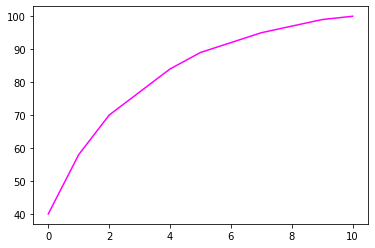

In [13]:
plt.plot(var1,color='magenta')

In [14]:
final_df=pd.concat([wine['Type'],pd.DataFrame(wine_pca[:,0:3],columns=['PC1','PC2','PC3'])],axis=1)
final_df

,Type,PC1,PC2,PC3
0,1,3.074764,-1.098338,-0.380628
1,1,2.103201,0.733151,-1.943496
2,1,2.601148,-1.274605,0.541557
3,1,3.537825,-2.361851,-0.693242
4,1,1.084299,-1.206377,1.772036
...,...,...,...,...
173,3,-2.916164,-1.109691,-0.515261
174,3,-2.443156,-1.371279,-0.039641
175,3,-2.454071,-2.346791,-1.653964
176,3,-2.511869,-2.353569,-1.093256


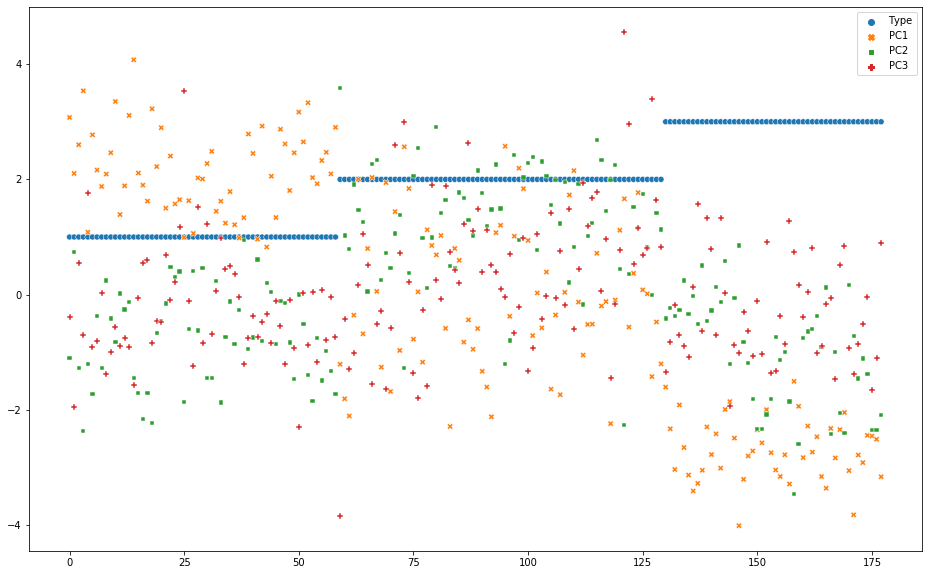

In [15]:
fig=plt.figure(figsize=(16,10))
sns.scatterplot(data=final_df)

In [16]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

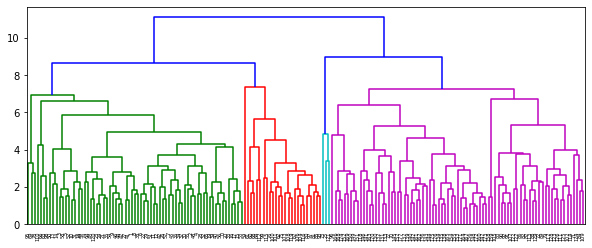

In [18]:
plt.figure(figsize=(10,4))
dendrogram=sch.dendrogram(sch.linkage(wine_norm,'complete'))

In [19]:
hclusters=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
hclusters

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3)

In [20]:
y=pd.DataFrame(hclusters.fit_predict(wine_norm),columns=['clustersid'])
y['clustersid'].value_counts()

0    72
1    66
2    40
Name: clustersid, dtype: int64

In [21]:
wine3=wine.copy()
wine3['clustersid']=hclusters.labels_
wine3

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clustersid
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0


In [22]:
from sklearn.cluster import KMeans

In [23]:
wcss=[]
for i in range (1,6):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(wine_norm)
    wcss.append(kmeans.inertia_)

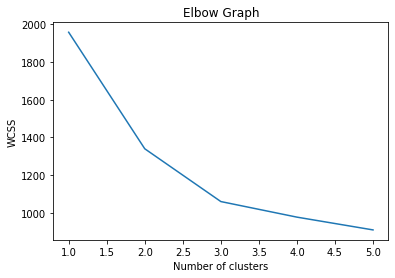

In [26]:
plt.plot(range(1,6),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [27]:
clusters3=KMeans(3,random_state=40).fit(wine_norm)
clusters3

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=40, tol=0.0001, verbose=0)

In [28]:
clusters3.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 1, 1, 1, 2,
       1, 1, 0, 2, 0, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [29]:
wine4=wine.copy()
wine4['clusters3id']=clusters3.labels_
wine4

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusters3id
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0


In [30]:
wine4['clusters3id'].value_counts()

2    69
1    55
0    54
Name: clusters3id, dtype: int64